# Business Case: Walmart - Confidence Interval and CLT 

 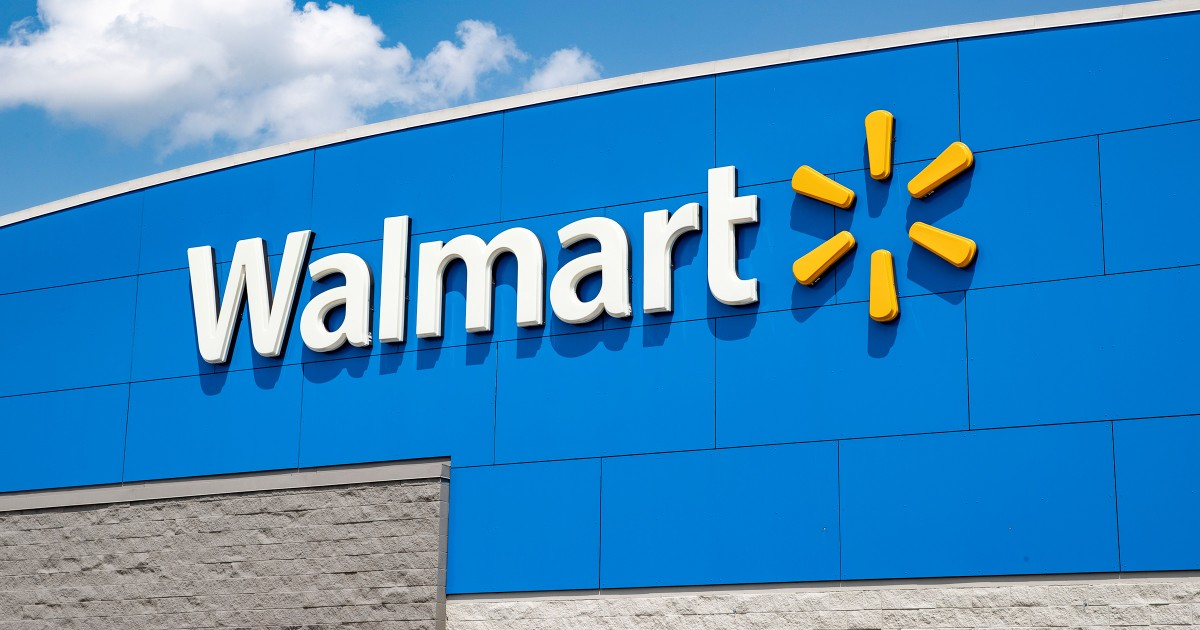

# Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
walmart_df = pd.read_csv('C://Users//dell//OneDrive//Desktop//Personal Doc//original_walmart_data.csv')
walmart_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [4]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
walmart_df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
walmart_df.shape

(550068, 10)

In [7]:
walmart_df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [8]:
walmart_df['Marital_Status'].replace({0:"Unmarried",
                            1:"Married"},inplace=True)
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [9]:
walmart_df['Gender'].replace({'F':"Female",
                            'M':"Male"},inplace=True)
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,Male,55+,16,C,4+,Unmarried,8,7969


In [10]:
# no. of people at different age groups
walmart_df['Age'].value_counts().sort_index()

0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64

In [11]:
# count of no. of married and unmarried male female work
walmart_df.groupby(["Marital_Status", "Gender"])["Occupation"].count().unstack()

Gender,Female,Male
Marital_Status,,
Married,56988,168349
Unmarried,78821,245910


In [12]:
# count of number of people at different age groups live in different city
walmart_df.groupby(["Age", "City_Category"])["Gender"].count().unstack()

City_Category,A,B,C
Age,,,
0-17,2544,5435,7123
18-25,27535,43247,28878
26-35,73745,91584,54258
36-45,26617,47598,35798
46-50,7607,20406,17688
51-55,6099,17741,14661
55+,3573,5162,12769


In [13]:
# different age groups of married unmarried people purchases
walmart_df.groupby(["Age", "Marital_Status"])["Purchase"].count().unstack()

Marital_Status,Married,Unmarried
Age,,
0-17,NaN,15102.0
18-25,21116.0,78544.0
26-35,86291.0,133296.0
36-45,43636.0,66377.0
46-50,33011.0,12690.0
51-55,27662.0,10839.0
55+,13621.0,7883.0


In [14]:
# no. of male and female wheather they are married or un married purchase a particular things.
walmart_df.groupby(["Gender", "Marital_Status"])["Purchase"].count().unstack()

Marital_Status,Married,Unmarried
Gender,,
Female,56988,78821
Male,168349,245910


In [15]:
# no. of years people are living in their respective cities 
walmart_df['Stay_In_Current_City_Years'].value_counts().sort_index()

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

In [16]:
#count of people live in different cities
walmart_df['City_Category'].value_counts().sort_index()

A    147720
B    231173
C    171175
Name: City_Category, dtype: int64

In [17]:
#count of no. of occupations
walmart_df['Occupation'].value_counts().sort_index()

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

In [18]:
# count of product categories.
walmart_df['Product_Category'].value_counts().sort_index()

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category, dtype: int64

In [19]:
#count of product id's
walmart_df['Product_ID'].value_counts().sort_index()

P00000142    1152
P00000242     376
P00000342     244
P00000442      92
P00000542     149
             ... 
P0099442      200
P0099642       13
P0099742      126
P0099842      102
P0099942       14
Name: Product_ID, Length: 3631, dtype: int64

In [20]:
#count of married and unmarried people
walmart_df['Marital_Status'].value_counts()

Unmarried    324731
Married      225337
Name: Marital_Status, dtype: int64

In [21]:
#count of no. of males and females
walmart_df['Gender'].value_counts()

Male      414259
Female    135809
Name: Gender, dtype: int64

In [22]:
#no. of married and unmarried people do occupations
walmart_df.groupby(["Gender", "Marital_Status"])["Occupation"].count().unstack()

Marital_Status,Married,Unmarried
Gender,,
Female,56988,78821
Male,168349,245910


What we have find in this dataset so far is-
* In this dataset there are 550068 rows and 10columns.
* In this dataset there are no null values in any column.
* In this dataset there are five "int64" Dtype columns and five "Object" Dtype columns.
* In this dataset we have replaced 0 to Unmarried and 1 to Married in Marital_Status Column so that it become easy to understand.
* In this dataset we have replaced F to Female and M to Male in Gender column.
* In this dataset we have seen no. of people at different age groups.
* In this dataset we have seen no. of married and unmarried male female work.
* In this dataset we have seen number of people at different age groups live in different city.
* In this dataset we have seen different age groups of married unmarried people purchases.
* In this dataset we have seen no. of male and female wheather they are married or un married purchase a particular things.
* In this dataset we have seen total no. of years people are living in their respective cities.
* In this dataset we have seen count of people live in different cities.
* In this dataset we have seen count of no. of occupations.
* In this dataset we have seen count of product categories.

# Visualizations 

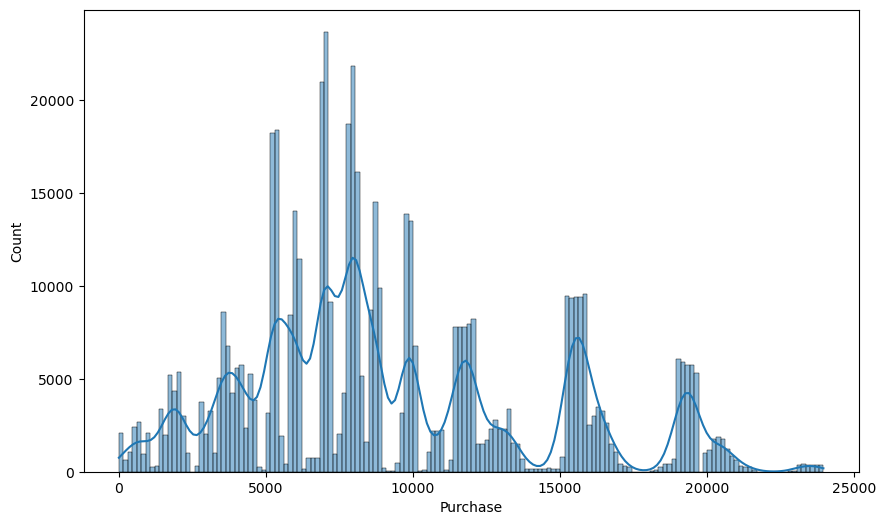

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=walmart_df, x='Purchase', kde=True)
plt.show()

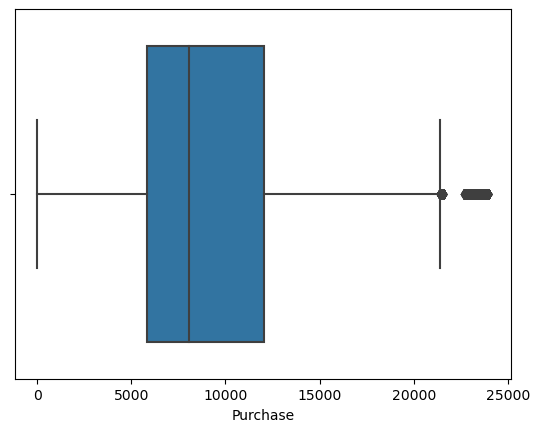

In [26]:
sns.boxplot(data=walmart_df, x='Purchase', orient='h')
plt.show()

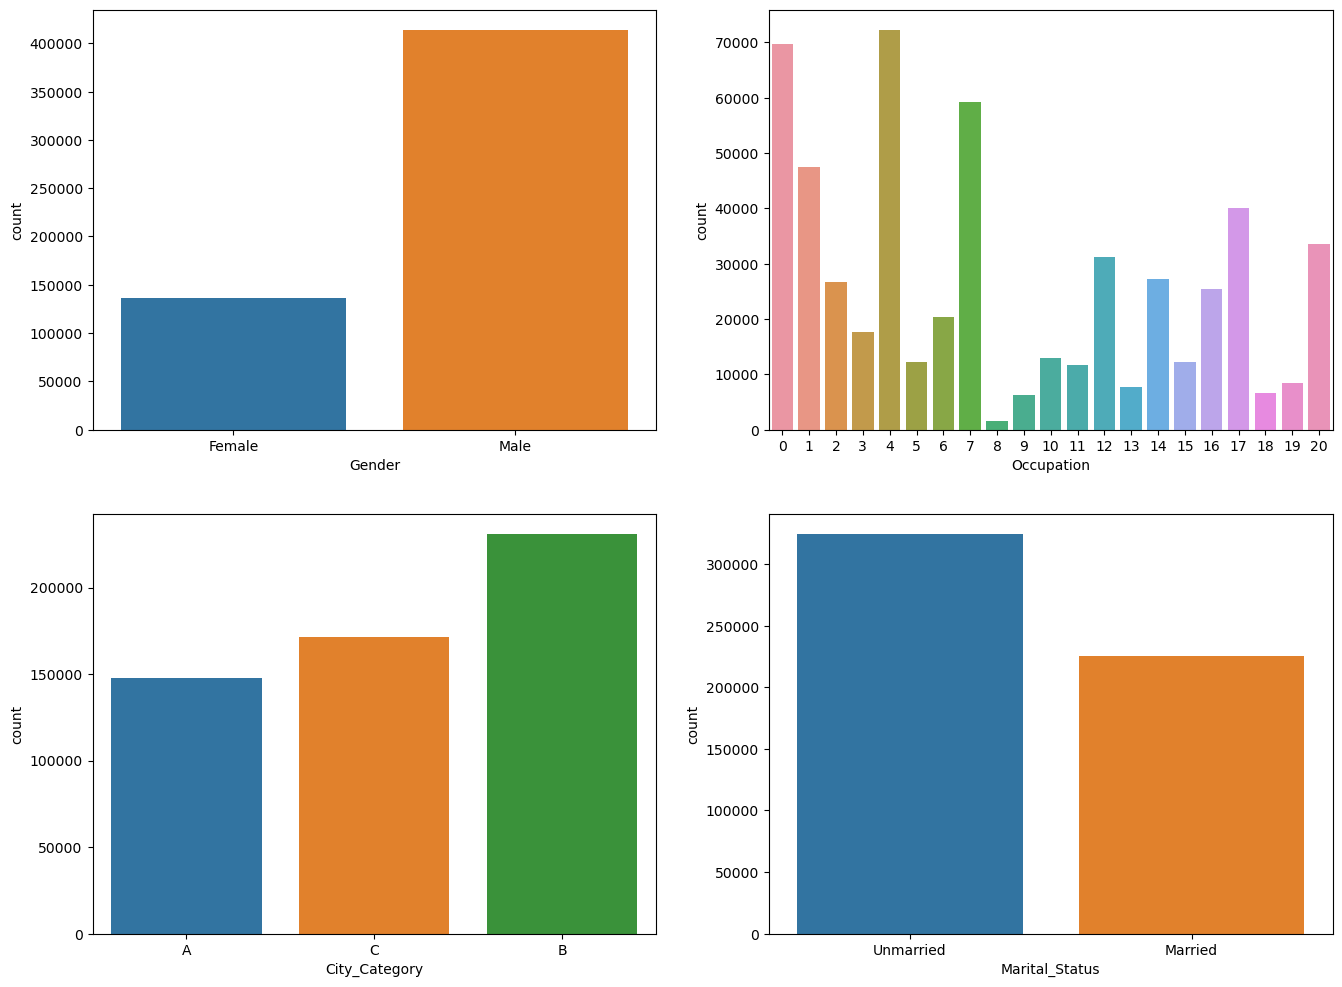

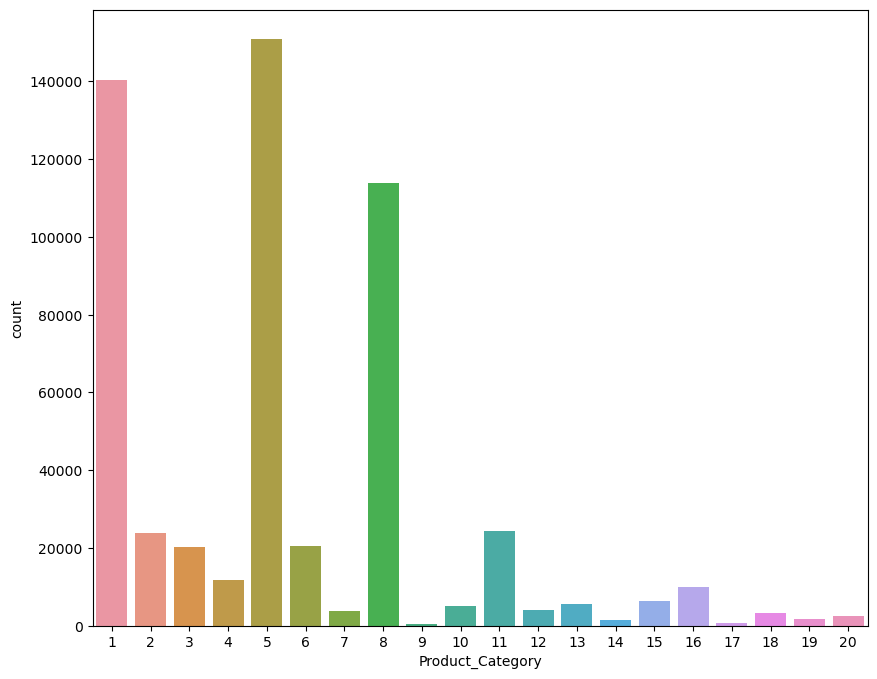

In [28]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=walmart_df, x='Gender', ax=axs[0,0])
sns.countplot(data=walmart_df, x='Occupation', ax=axs[0,1])
sns.countplot(data=walmart_df, x='City_Category', ax=axs[1,0])
sns.countplot(data=walmart_df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=walmart_df, x='Product_Category')
plt.show()

Observations
* Most of the users are Male
* There are 20 different types of Occupation and Product_Category
* More users belong to B City_Category
* More users are Single as compare to Married
* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

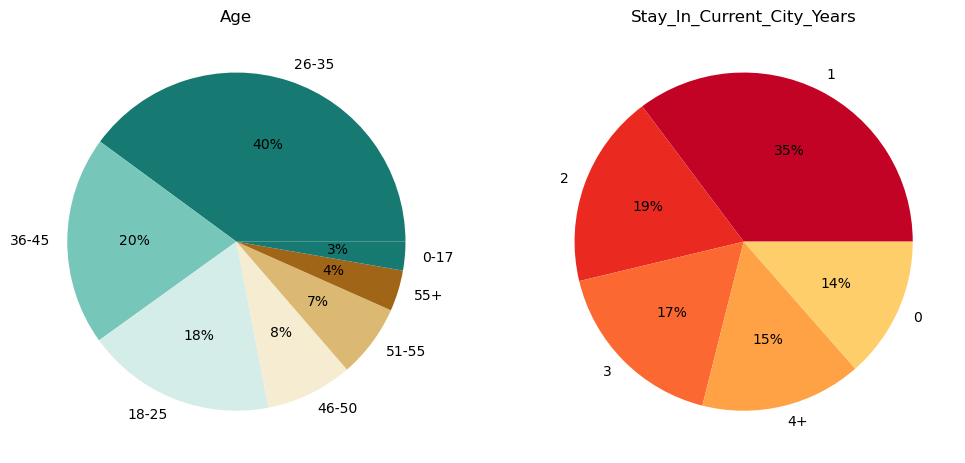

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
data = walmart_df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = walmart_df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

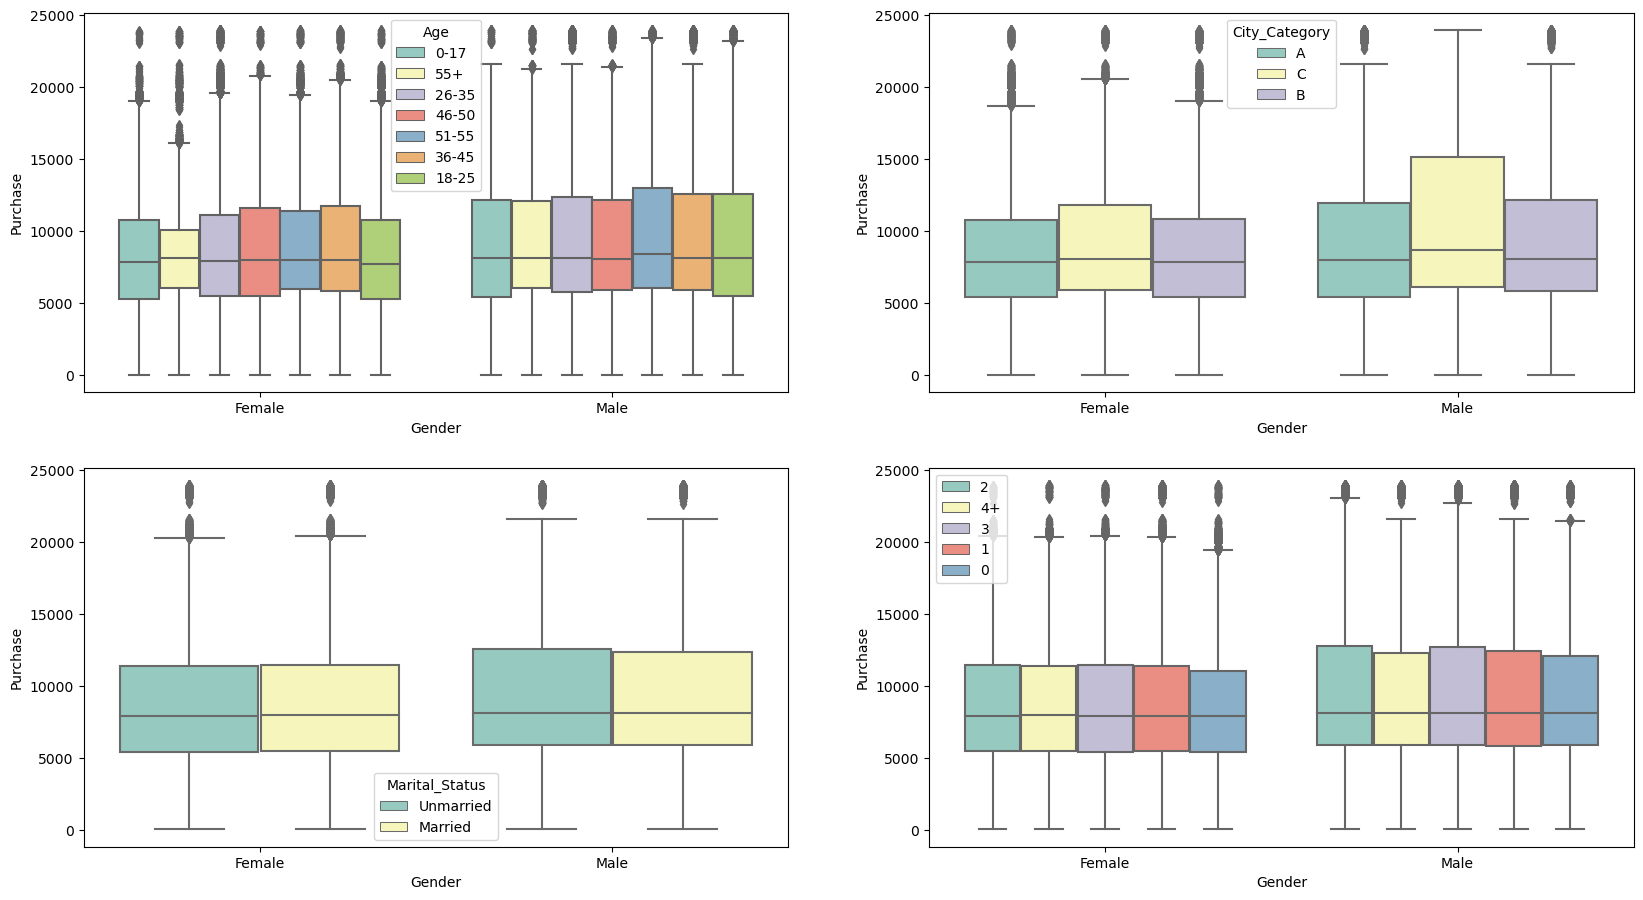

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=walmart_df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=walmart_df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=walmart_df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=walmart_df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [32]:
amt_df = walmart_df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,Female,334093
1,1000002,Male,810472
2,1000003,Male,341635
3,1000004,Male,206468
4,1000005,Male,821001
...,...,...,...
5886,1006036,Female,4116058
5887,1006037,Female,1119538
5888,1006038,Female,90034
5889,1006039,Female,590319


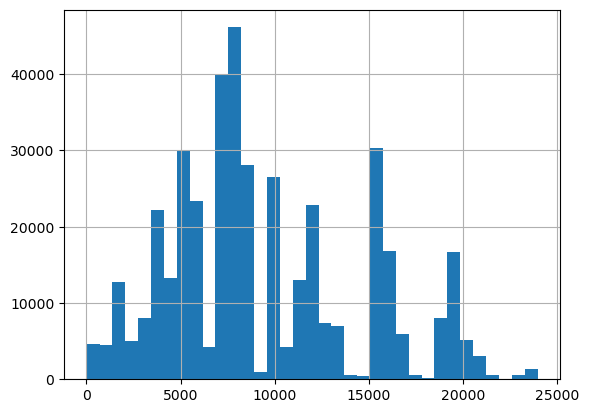

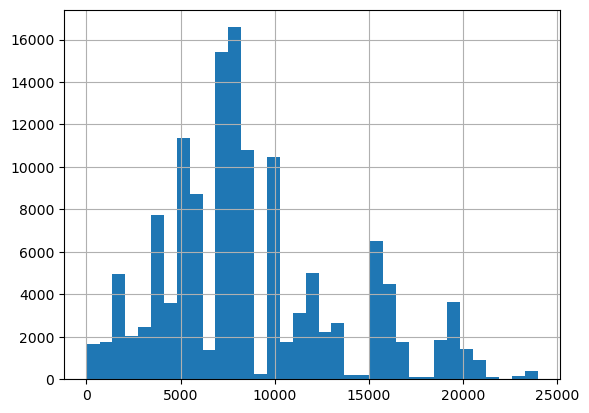

In [27]:
# histogram of average amount spend for each customer - Male & Female
walmart_df[walmart_df['Gender']=='Male']['Purchase'].hist(bins=35)
plt.show()

walmart_df[walmart_df['Gender']=='Female']['Purchase'].hist(bins=35)
plt.show()

In [30]:
male_average = walmart_df[walmart_df['Gender']=='Male']['Purchase'].mean()
female_average = walmart_df[walmart_df['Gender']=='Female']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_average))
print("Average amount spend by Female customers: {:.2f}".format(female_average))

Average amount spend by Male customers: 9437.53
Average amount spend by Female customers: 8734.57


### Observation

* Male customers spend more money than female customers

In [35]:
male_df = walmart_df[walmart_df['Gender']=='Male']
male_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,Male,55+,16,C,4+,Unmarried,8,7969
5,1000003,P00193542,Male,26-35,15,A,3,Unmarried,1,15227
6,1000004,P00184942,Male,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,Male,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,Male,46-50,7,B,2,Married,1,15686


In [36]:
female_df = walmart_df[walmart_df['Gender']=='Female']
female_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,Unmarried,12,1057
14,1000006,P00231342,Female,51-55,9,A,1,Unmarried,5,5378


In [37]:
genders = ["Male", "Female"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

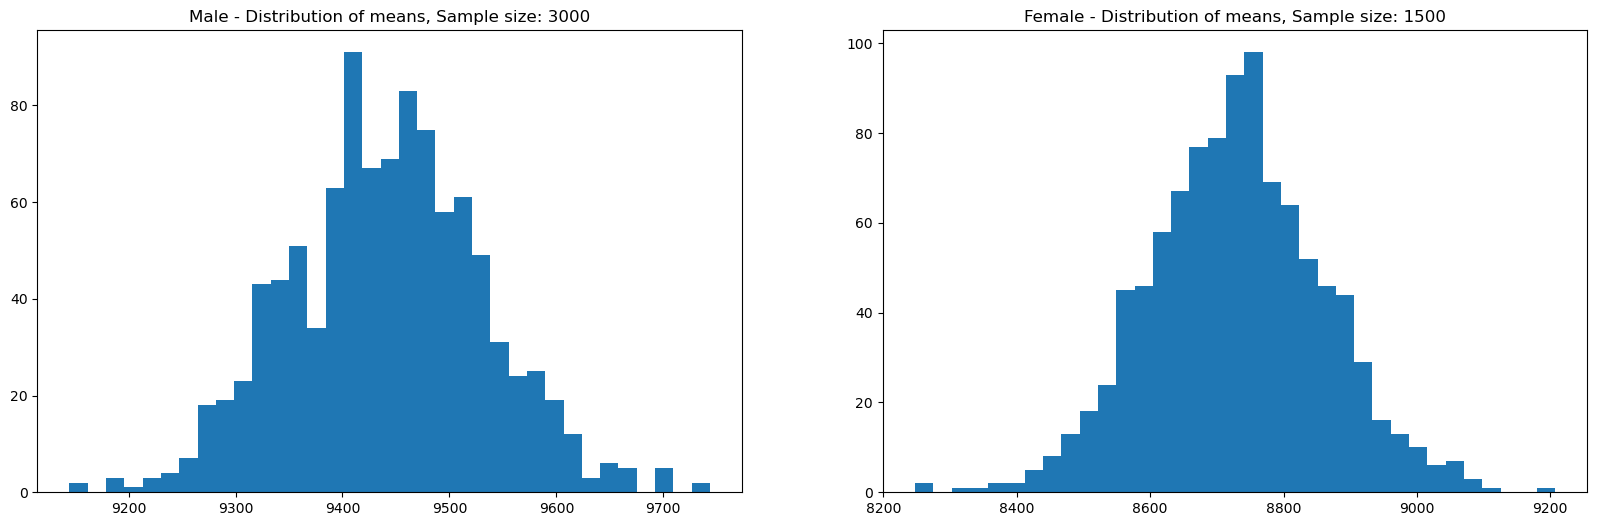

In [38]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [39]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 9441.45
Population mean - Mean of sample means of amount spend for Female: 8729.10

Male - Sample mean: 9437.53 Sample std: 5092.19
Female - Sample mean: 8734.57 Sample std: 4767.23


In [40]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (9422.02, 9453.03)
Female confidence interval of means: (8709.21, 8759.92)


# Analysis between Married and Unmarried

In [43]:
walmart_df = walmart_df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
walmart_df = walmart_df.reset_index()
walmart_df

,User_ID,Marital_Status,Purchase
0,1000001,Unmarried,334093
1,1000002,Unmarried,810472
2,1000003,Unmarried,341635
3,1000004,Married,206468
4,1000005,Married,821001
...,...,...,...
5886,1006036,Married,4116058
5887,1006037,Unmarried,1119538
5888,1006038,Unmarried,90034
5889,1006039,Married,590319


In [44]:
walmart_df['Marital_Status'].value_counts()

Unmarried    3417
Married      2474
Name: Marital_Status, dtype: int64

In [51]:
married_sample_size = 3000
unmarried_sample_size = 2000
num_repitions = 1000
married_means = []
unmarried_means = []

for _ in range(num_repitions):
    married_mean = walmart_df[walmart_df['Marital_Status']=='Married'].sample(married_sample_size, replace=True)['Purchase'].mean()
    unmarried_mean = walmart_df[walmart_df['Marital_Status']=='Unmarried'].sample(unmarried_sample_size, replace=True)['Purchase'].mean()
    
    married_means.append(married_mean)
    unmarried_means.append(unmarried_mean)

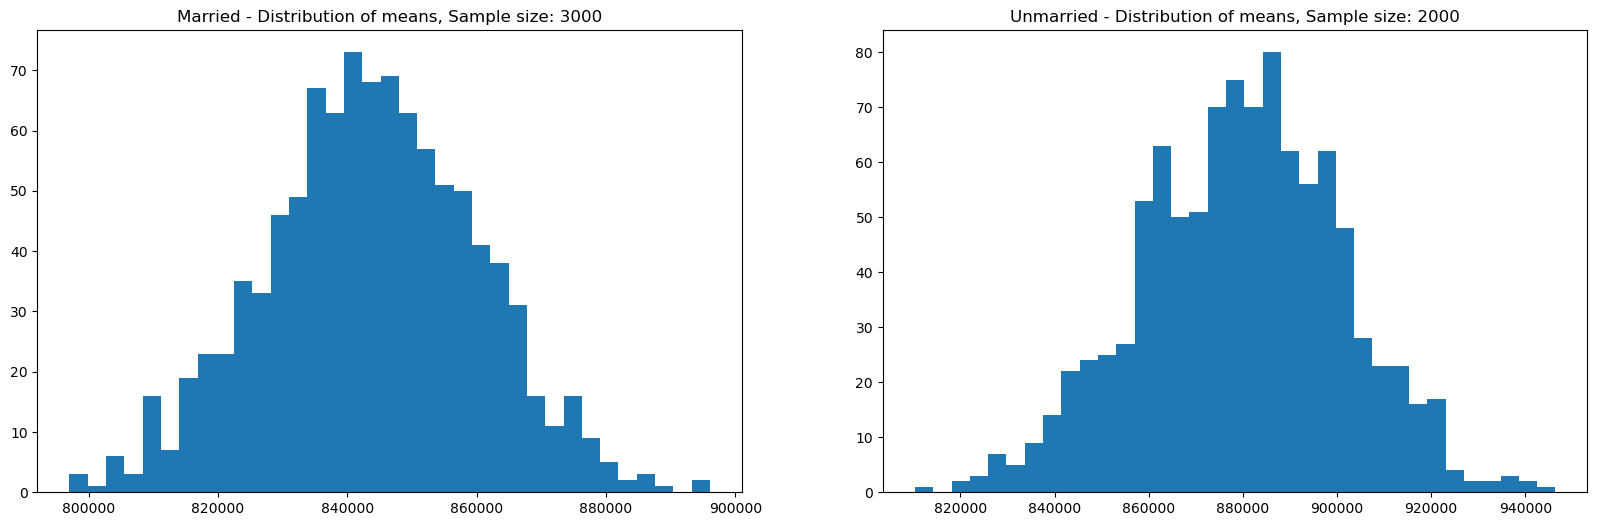

In [52]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35)
axis[1].hist(unmarried_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

In [53]:
print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(married_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarried_means)))

Population mean - Mean of sample means of amount spend for Married: 843757.39
Population mean - Mean of sample means of amount spend for Unmarried: 879585.29


In [56]:
print("Married - Sample mean: {:.2f} Sample std: {:.2f}".format(walmart_df[walmart_df['Marital_Status']=='Married']['Purchase'].mean(), walmart_df[walmart_df['Marital_Status']=='Married']['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(walmart_df[walmart_df['Marital_Status']=='Unmarried']['Purchase'].mean(), walmart_df[walmart_df['Marital_Status']=='Unmarried']['Purchase'].std()))

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [58]:
for val in ["Married", "Unmarried"]:
    
    new_val = 'Married' if val == "Married" else 'Unmarried'
    
    new_df = walmart_df[walmart_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


# Recommendations
* Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
* Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
* Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45